In [1]:
import numpy as np
import pandas as pd
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
%matplotlib inline

# make prettier plots
%config InlineBackend.figure_format = 'svg' 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
file = open('cleaned_cc_default_data', 'rb')
model_data = pickle.load(file)

# EDA

### Exploring population distributions

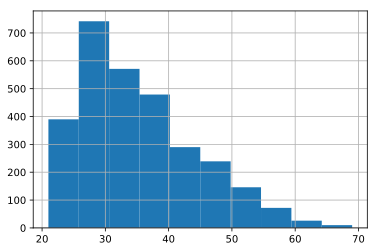

In [3]:
model_data.age.hist()

In [ ]:
# Distribution of ages of people in the dataset

plt.figure(figsize=(12,5))
sns.countplot(x="age", data=model_data, color='b')

In [ ]:
model_data.sex.hist()

In [ ]:
# Distribution of gender of people in the dataset (1=male, 2=female)

plt.figure(figsize=(5,5))
sns.countplot(x="sex", data=model_data)

In [ ]:
model_data.marital_status.hist()

In [ ]:
# Distribution of marital status of people in the dataset (1=married, 2=single, 3=other)

plt.figure(figsize=(7,5))
sns.countplot(x="marital_status", data=model_data)

In [ ]:
model_data.education_level.hist()

In [ ]:
# Distribution of education level of people in the dataset (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

plt.figure(figsize=(7,5))
sns.countplot(x="education_level", data=model_data)

### Exploring bill and payment distributions

In [ ]:
model_data.limit_balance.hist()

In [ ]:
# Distribution of credit limit for people in the dataset

plt.figure(figsize=(7,5))
sns.distplot(a="limit_balance", data=model_data)

In [ ]:
# probability distribution showing bill amounts each month
# shows means and spread

plt.figure(dpi=400)
column_names = ['bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6']
sns.distplot(model_data.bill_amt_1)
sns.distplot(model_data.bill_amt_2)
sns.distplot(model_data.bill_amt_3)
sns.distplot(model_data.bill_amt_4)
sns.distplot(model_data.bill_amt_5)
sns.distplot(model_data.bill_amt_6)

plt.legend(column_names)

In [ ]:
# barplot showing mean bill amounts per month

plt.figure(dpi=400)
bill_amt_columns = ['bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6']
bill_amt_means = [model_data.bill_amt_1.mean(), model_data.bill_amt_2.mean(), model_data.bill_amt_3.mean(), model_data.bill_amt_4.mean(), model_data.bill_amt_5.mean(), model_data.bill_amt_6.mean()]
sns.barplot(bill_amt_columns, bill_amt_means)

In [ ]:
# barplot showing mean pay amounts per month

plt.figure(dpi=400)
pay_columns = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
pay_means = [model_data.pay_0.mean(), model_data.pay_2.mean(), model_data.pay_3.mean(), model_data.pay_4.mean(), model_data.pay_5.mean(), model_data.pay_6.mean()]
sns.barplot(pay_columns,pay_means)

### Exploring variable-to-variable relationships

In [ ]:
# Plot all of the variable-to-variable relationships for bill amounts and pay amounts as scatterplots to visualize correlations all together

bill_pay_amts_columns = ['bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 
               'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']

df_bill_pay_amts = model_data[bill_pay_amts_columns]

sns.pairplot(df_bill_pay_amts);

In [ ]:
# Plot the correlation matrix
# Note based on my convo with Aaron - this doesn't tell me a lot...

corrs = model_data.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrs, square=True, cmap="RdBu_r");
plt.savefig(fname='corr_matrix', dpi=150)

In [ ]:
model_data.corr()

### Exploring class balance

In [ ]:
# target count to determine if classes are imbalanced

target_count = model_data.default_payment_next_month.value_counts()

# print class balance
print(f'Class 0: {target_count[0]}')
print(f'Class 1: {target_count[1]}')
print(f'Proportion: {round(target_count[0] / target_count[1], 2)} : 1')
print(f'Percentage of Majority Class: {round(target_count[0] / sum(target_count), 4)*100}')

In [ ]:
target_count.plot(kind='bar', title='Class Count', rot=0);